# Machine Learning Group 7
## Judul
1. 44819 - Axl Ray Aditya
2. 76229 - Catherine Olivia
3. 77737 - Ronan Lie
4. 77121 - Zevanaya Beverly Drew








In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Test

### Explore and Preprocessing Data

In [2]:
# Baca data
lc = pd.read_csv("cancer patient data sets.csv")
lc.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
# Cek info tentang dataset
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [4]:
lc.shape

(1000, 26)

In [5]:
# Cek kolom dan baris data sebelum di drop
print(lc.shape)
print(list(lc.columns))
# 26 kolom dengan 1000 baris data

(1000, 26)
['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']


In [6]:
# Drop kolom fitur yang tidak digunakan
lc = lc.drop(['index', 'Patient Id', 'Age', 'Gender'], axis = 1)
lc.head()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,2,4,5,4,3,2,2,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,3,1,5,3,4,2,2,2,2,4,...,1,3,7,8,6,2,1,7,2,Medium
2,4,5,6,5,5,4,6,7,2,3,...,8,7,9,2,1,4,6,7,2,High
3,7,7,7,7,6,7,7,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,6,8,7,7,7,6,7,7,8,7,...,3,2,4,1,4,2,4,2,3,High


In [7]:
# Cek kolom dan baris data setelah di drop
print(lc.shape)
print(list(lc.columns))
# 8 kolom dengan 1000 baris data

(1000, 22)
['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']


In [8]:
# Rename Kolom
lc.rename(columns = {"Air Pollution": "AirPollution", "Genetic Risk": "GeneticRisk", "chronic Lung Disease": "chronicLungDisease",
                     "Passive Smoker": "PassiveSmoker", "Chest Pain": "ChestPain", "Shortness of Breath": "ShortnessOfBreath"}, inplace = True)
lc.head()

,AirPollution,Alcohol use,Dust Allergy,OccuPational Hazards,GeneticRisk,chronicLungDisease,Balanced Diet,Obesity,Smoking,PassiveSmoker,...,Fatigue,Weight Loss,ShortnessOfBreath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,2,4,5,4,3,2,2,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,3,1,5,3,4,2,2,2,2,4,...,1,3,7,8,6,2,1,7,2,Medium
2,4,5,6,5,5,4,6,7,2,3,...,8,7,9,2,1,4,6,7,2,High
3,7,7,7,7,6,7,7,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,6,8,7,7,7,6,7,7,8,7,...,3,2,4,1,4,2,4,2,3,High


In [9]:
# Cek statistik data
lc.describe()

,AirPollution,Alcohol use,Dust Allergy,OccuPational Hazards,GeneticRisk,chronicLungDisease,Balanced Diet,Obesity,Smoking,PassiveSmoker,...,Coughing of Blood,Fatigue,Weight Loss,ShortnessOfBreath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [10]:
# Cek null
lc.isnull().sum()
# Tidak ada yang missing values

AirPollution                0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
GeneticRisk                 0
chronicLungDisease          0
Balanced Diet               0
Obesity                     0
Smoking                     0
PassiveSmoker               0
ChestPain                   0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
ShortnessOfBreath           0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [11]:
# Cek unique values
lc.nunique()

AirPollution                8
Alcohol use                 8
Dust Allergy                8
OccuPational Hazards        8
GeneticRisk                 7
chronicLungDisease          7
Balanced Diet               7
Obesity                     7
Smoking                     8
PassiveSmoker               8
ChestPain                   9
Coughing of Blood           9
Fatigue                     8
Weight Loss                 8
ShortnessOfBreath           8
Wheezing                    8
Swallowing Difficulty       8
Clubbing of Finger Nails    9
Frequent Cold               7
Dry Cough                   7
Snoring                     7
Level                       3
dtype: int64

In [12]:
# Encoding label
lc['Level'] = lc['Level'].astype('category')
lc['LevelCode'] = lc['Level'].cat.codes
lc.head()

# Level dan LevelCode-nya
# High = 0
# Low = 1
# Medium = 2

,AirPollution,Alcohol use,Dust Allergy,OccuPational Hazards,GeneticRisk,chronicLungDisease,Balanced Diet,Obesity,Smoking,PassiveSmoker,...,Weight Loss,ShortnessOfBreath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,LevelCode
0,2,4,5,4,3,2,2,4,3,2,...,4,2,2,3,1,2,3,4,Low,1
1,3,1,5,3,4,2,2,2,2,4,...,3,7,8,6,2,1,7,2,Medium,2
2,4,5,6,5,5,4,6,7,2,3,...,7,9,2,1,4,6,7,2,High,0
3,7,7,7,7,6,7,7,7,7,7,...,2,3,1,4,5,6,7,5,High,0
4,6,8,7,7,7,6,7,7,8,7,...,2,4,1,4,2,4,2,3,High,0


In [13]:
# Drop kolom level
lc = lc.drop("Level", axis = 1)
lc.head()

,AirPollution,Alcohol use,Dust Allergy,OccuPational Hazards,GeneticRisk,chronicLungDisease,Balanced Diet,Obesity,Smoking,PassiveSmoker,...,Fatigue,Weight Loss,ShortnessOfBreath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,LevelCode
0,2,4,5,4,3,2,2,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,3,1,5,3,4,2,2,2,2,4,...,1,3,7,8,6,2,1,7,2,2
2,4,5,6,5,5,4,6,7,2,3,...,8,7,9,2,1,4,6,7,2,0
3,7,7,7,7,6,7,7,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,6,8,7,7,7,6,7,7,8,7,...,3,2,4,1,4,2,4,2,3,0


In [14]:
# Baris dan kolom sekarang
print(lc.shape)
print(list(lc.columns))

(1000, 22)
['AirPollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'GeneticRisk', 'chronicLungDisease', 'Balanced Diet', 'Obesity', 'Smoking', 'PassiveSmoker', 'ChestPain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'ShortnessOfBreath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'LevelCode']


In [15]:
# Jumlah masing-masing Level Code
lc['LevelCode'].value_counts()

LevelCode
0    365
2    332
1    303
Name: count, dtype: int64

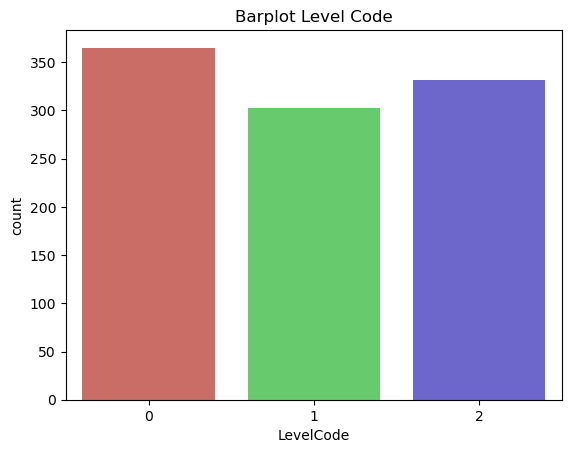

Percentage of High is 36.5
Percentage of Low is 30.3
Percentage of Medium is 33.2


In [16]:
# Visualisasi 1
sns.countplot(x = 'LevelCode', data = lc, palette = 'hls')
plt.savefig('count_plot')
plt.title('Barplot Level Code')
plt.show()

count_zr = len(lc[lc['LevelCode']==0])
count_on = len(lc[lc['LevelCode']==1])
count_tw = len(lc[lc['LevelCode']==2])

pct_of_zr = count_zr/(count_zr+count_on+count_tw)
print('Percentage of High is', pct_of_zr*100)

pct_of_on = count_on/(count_zr+count_on+count_tw)
print('Percentage of Low is', pct_of_on*100)

pct_of_tw = count_tw/(count_zr+count_on+count_tw)
print('Percentage of Medium is', pct_of_tw*100)

Text(0.5, 1.0, 'Distribusi Data Lung Cancer')

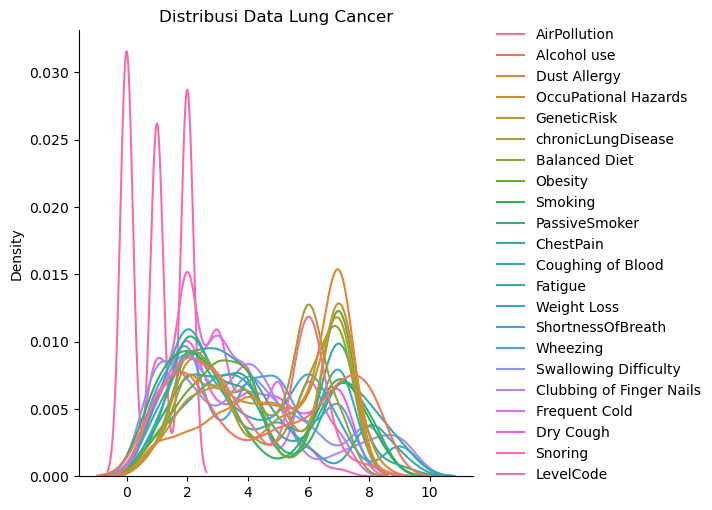

In [17]:
# Visualisasi 2

# Distribusi bell untuk melihat kenormalan atribut data.
sns.displot(data=lc, kind="kde")
plt.title('Distribusi Data Lung Cancer')
# Tidak berdistribusi dengan normal karena seluruh atribut mempunyai lebih dari satu lonceng.

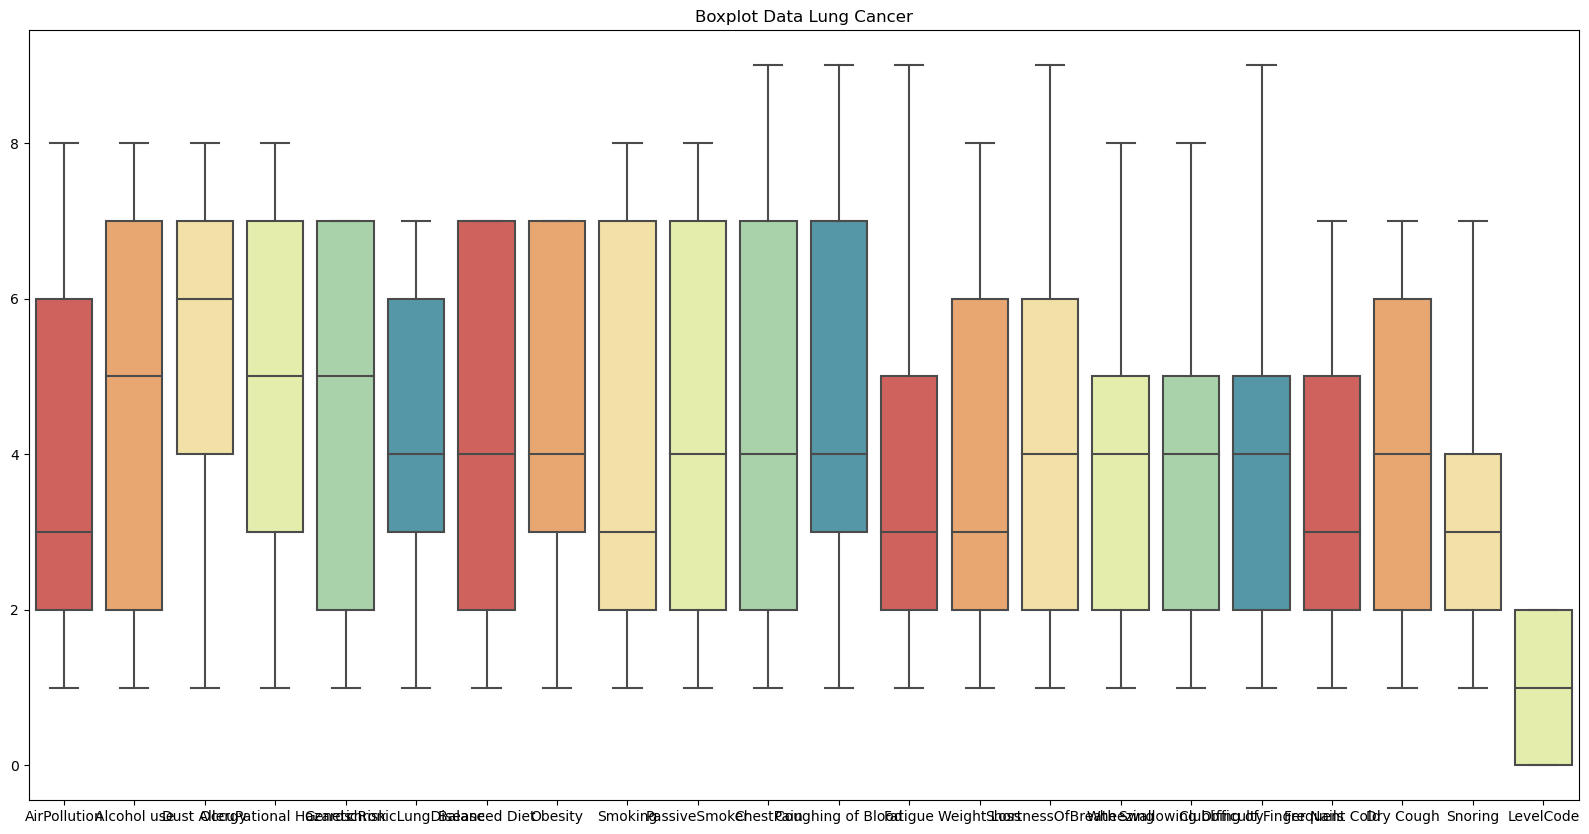

In [18]:
# Visualisasi 3

# Boxplot untuk melihat outlier dataset.
colors = sns.color_palette("Spectral")
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = lc, palette = colors)
plt.title("Boxplot Data Lung Cancer")
plt.show()
# Tidak ada data yang outlier.

Text(0, 0.5, 'Persebaran Level Lung Cancer')

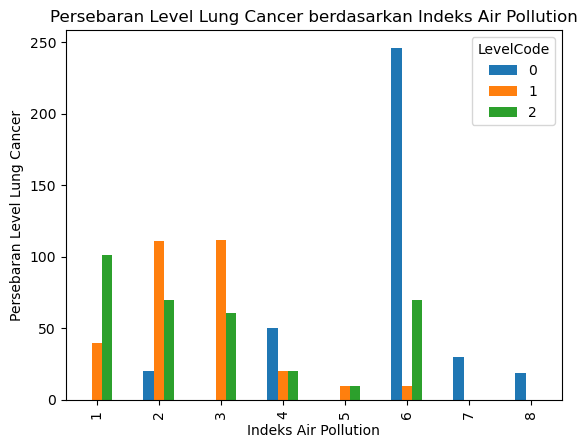

In [19]:
# Visualisasi 4

%matplotlib inline
pd.crosstab(lc.AirPollution, lc.LevelCode).plot(kind="bar")
plt.title('Persebaran Level Lung Cancer berdasarkan Indeks Air Pollution')
plt.xlabel('Indeks Air Pollution')
plt.ylabel('Persebaran Level Lung Cancer')

Text(0, 0.5, 'Frequency')

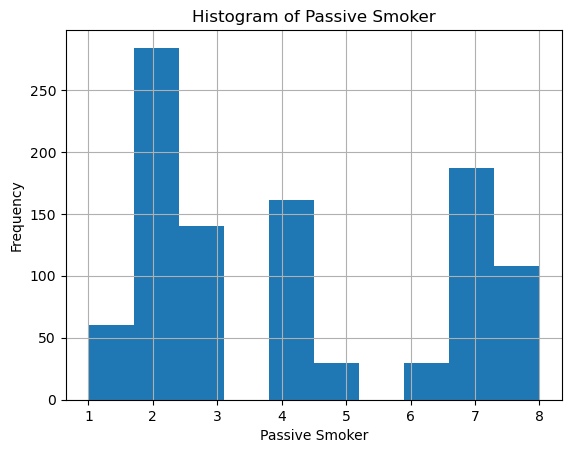

In [20]:
# Visualisasi 5

lc.PassiveSmoker.hist()
plt.title("Histogram of Passive Smoker")
plt.xlabel('Passive Smoker')
plt.ylabel('Frequency')

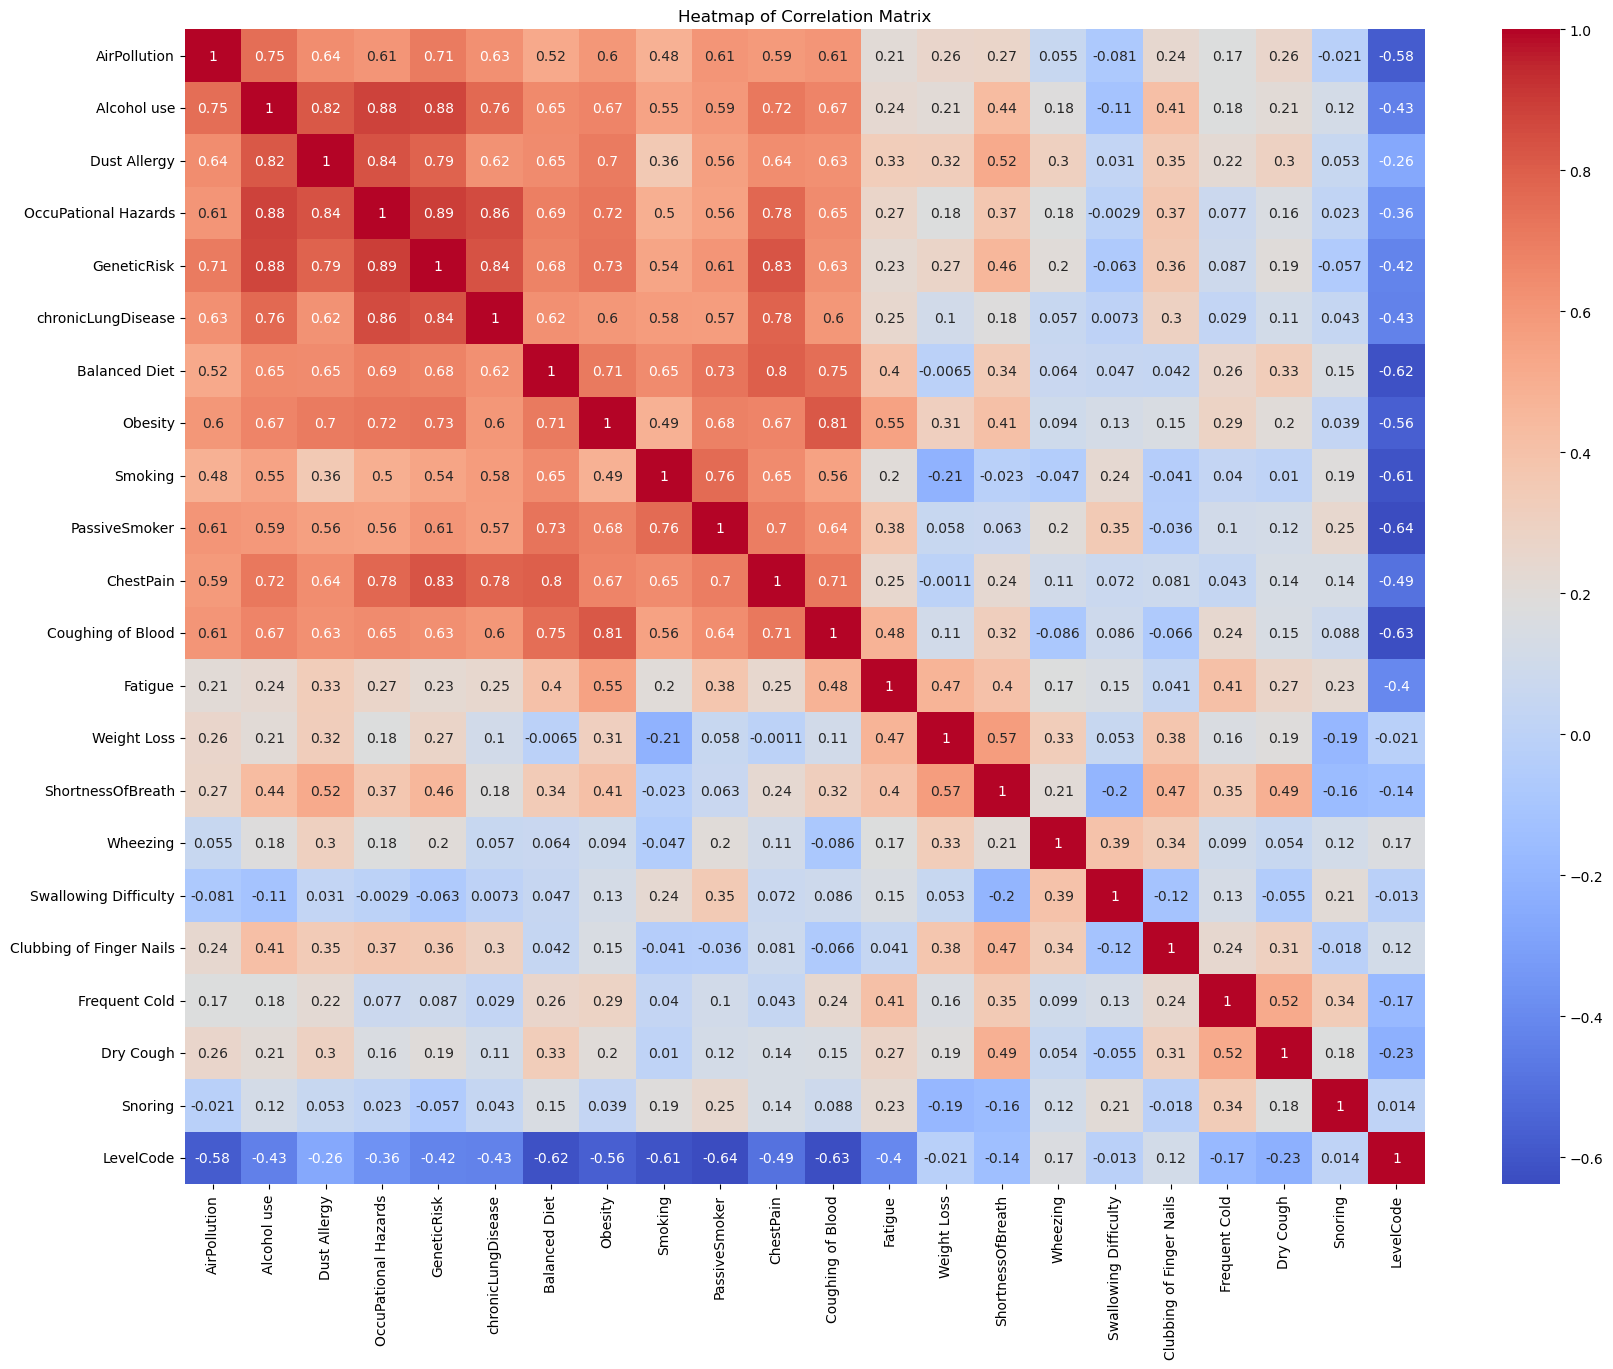

In [78]:
# Visualisasi 6

plt.figure(figsize=(20, 15))
sns.heatmap(lc.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlation Matrix")
plt.show()

Fitur = Alcohol use, occupational hazard, dust allergy, genetic risk, air pollution, coughing of blood, obesity, balanced diet, genetic risk, chronic lung disease

# Hasil Logistic Regression

In [22]:
print(list(lc.columns))

['AirPollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'GeneticRisk', 'chronicLungDisease', 'Balanced Diet', 'Obesity', 'Smoking', 'PassiveSmoker', 'ChestPain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'ShortnessOfBreath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'LevelCode']


In [23]:
feature = ['Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'GeneticRisk','chronicLungDisease', 'Balanced Diet', 'Smoking', 'Coughing of Blood', 'Obesity', 'AirPollution', 'PassiveSmoker', ]

## Train Test Split Logistic Regression

In [24]:
X = lc[feature]
y = lc['LevelCode']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

## Classification Report

In [28]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[82  0  0]
 [ 0 46  9]
 [ 1  9 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.84      0.84      0.84        55
           2       0.85      0.84      0.85        63

    accuracy                           0.91       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.91      0.90       200



## Testing Accuracy

In [29]:
print('Accuracy : {:.2f}'.format(model.score(X_test, y_test)))

Accuracy : 0.91


## Training/Validation Accuracy

In [30]:
print('Accuracy : {:.2f}'.format(model.score(X_train, y_train)))

Accuracy : 0.87


## K-FOLD

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k = 10

kf = KFold(n_splits=k, shuffle=True)

model = LogisticRegression()

cv_scores = cross_val_score(model, X, y, cv=kf)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.84 0.89 0.83 0.83 0.87 0.88 0.92 0.83 0.89 0.89]
Average cross-validation score: 0.867


## Error Rate

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
error_rate = 1 - accuracy_score(y_test, y_pred)
print('Error rate:', error_rate)

Error rate: 0.09499999999999997


## Checking C Value Accuracy

In [34]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

for C in C_values:
    model = LogisticRegression(C= C, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

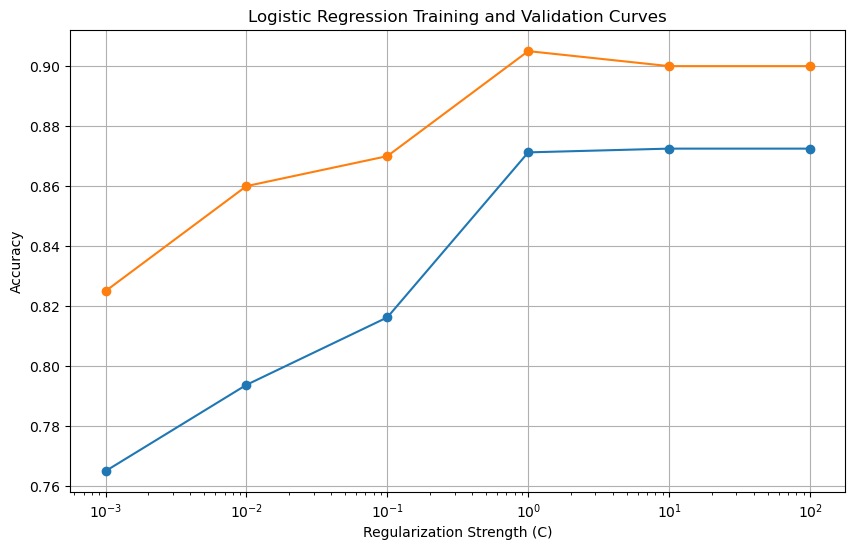

In [35]:
plt.figure(figsize=(10,6))
plt.plot(C_values, train_scores, label= "Training Accuracy", marker='o')
plt.plot(C_values, test_scores, label= "Testing Accuracy", marker='o')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title("Logistic Regression Training and Validation Curves")
plt.xscale('log')
plt.legend
plt.grid(True)

## Perbandingan Hasil Akurasi dengan fitur ('AirPollution', 'chronicLungDisease', 'Smoking', 'PassiveSmoker', 'ChestPain', 'ShortnessOfBreath')

In [36]:
lc_X = lc.copy()
lc_y = lc.copy()

x_columns = ['AirPollution', 'chronicLungDisease', 'Smoking', 'PassiveSmoker', 'ChestPain', 'ShortnessOfBreath']
y_columns = ['LevelCode']


X = lc_X[x_columns]
y = lc_y[y_columns]

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Initialize logistic regression model
model = LogisticRegression()

In [39]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

## Hasil Testing Accuracy

In [40]:
print('Accuracy : {:.2f}'.format(model.score(X_test, y_test)))

Accuracy : 0.89


## Accuracy Training/Validation

In [41]:
print('Accuracy : {:.2f}'.format(model.score(X_train, y_train)))

Accuracy : 0.89


In [42]:
## Classification Report

In [43]:
# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[82  0  0]
 [ 0 42 13]
 [ 0 10 53]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.81      0.76      0.79        55
           2       0.80      0.84      0.82        63

    accuracy                           0.89       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.89      0.89      0.88       200



## Error Rate

In [44]:
error_rate = 1 - accuracy_score(y_test, y_pred)
print('Error rate:', error_rate)

Error rate: 0.11499999999999999


## KFOLD

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k = 10

kf = KFold(n_splits=k, shuffle=True)

model = LogisticRegression()

cv_scores = cross_val_score(model, X, y, cv=kf)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.84 0.86 0.9  0.88 0.87 0.83 0.86 0.76 0.81 0.86]
Average cross-validation score: 0.8470000000000001


## Passive Smoker and Active

In [46]:
lc_X = lc.copy()
lc_y = lc.copy()

x_columns = ['Smoking', 'PassiveSmoker']
y_columns = ['LevelCode']


X = lc_X[x_columns]
y = lc_y[y_columns]

## Train Test Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LogisticRegression()

In [49]:
model.fit(X_train, y_train)

LogisticRegression()

## Hasil Testing Accuracy

In [50]:
print('Accuracy : {:.2f}'.format(model.score(X_test, y_test)))

Accuracy : 0.76


## Hasil Training/Validation Accuracy

In [51]:
print('Accuracy : {:.2f}'.format(model.score(X_train, y_train)))

Accuracy : 0.69


## Classification Report

In [52]:
# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[69  0 13]
 [ 2 38 15]
 [ 3 15 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        82
           1       0.72      0.69      0.70        55
           2       0.62      0.71      0.66        63

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.77      0.76      0.76       200



In [53]:
error_rate = 1 - accuracy_score(y_test, y_pred)
print('Error rate:', error_rate)

Error rate: 0.24


## Air Pollution

In [54]:
lc_X = lc.copy()
lc_y = lc.copy()

x_columns = ['AirPollution']
y_columns = ['LevelCode']


X = lc_X[x_columns]
y = lc_y[y_columns]

## Train Test Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model.fit(X_train, y_train)

LogisticRegression()

## Hasil Testing Accuracy

In [57]:
print('Accuracy : {:.2f}'.format(model.score(X_test, y_test)))

Accuracy : 0.53


## Hasil Train/Validation Accuracy

In [58]:
print('Accuracy : {:.2f}'.format(model.score(X_train, y_train)))

Accuracy : 0.53


## Error Rate

In [59]:
print('Accuracy : {:.2f}'.format(model.score(X_test, y_test)))

Accuracy : 0.53


## Chest Pain, Genetic, and Chronic Lung Disease

In [60]:
lc_X = lc.copy()
lc_y = lc.copy()

x_columns = ['chronicLungDisease', 'GeneticRisk', 'ChestPain', 'ShortnessOfBreath' ]
y_columns = ['LevelCode']


X = lc_X[x_columns]
y = lc_y[y_columns]

## Train Test Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model.fit(X_train, y_train)

LogisticRegression()

## Hasil Testing Accuracy

In [63]:
print('Accuracy : {:.2f}'.format(model.score(X_test, y_test)))

Accuracy : 0.77


## Hasil Training/Validation Accuracy

In [64]:
print('Accuracy : {:.2f}'.format(model.score(X_train, y_train)))

Accuracy : 0.79


## Error Rate

In [65]:
print('Accuracy : {:.2f}'.format(model.score(X_test, y_test)))

Accuracy : 0.77


## Menggunakan Semua Fitur


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = lc.drop('LevelCode', axis=1)  # Features
y = lc['LevelCode']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
model = LogisticRegression()

In [68]:
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred = model.predict(X_test)

## Akurasi testing dan training

In [70]:
print('Accuracy : {:.2f}'.format(model.score(X_test, y_test)))
print('Accuracy : {:.2f}'.format(model.score(X_train, y_train)))

Accuracy : 1.00
Accuracy : 1.00


## Classification Report

In [71]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[66  0  0]
 [ 0 71  0]
 [ 0  0 63]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Error Rate

In [72]:
error_rate = 1 - accuracy_score(y_test, y_pred)
print('Error rate:', error_rate)

Error rate: 0.0


In [73]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

for C in C_values:
    model = LogisticRegression(C= C, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

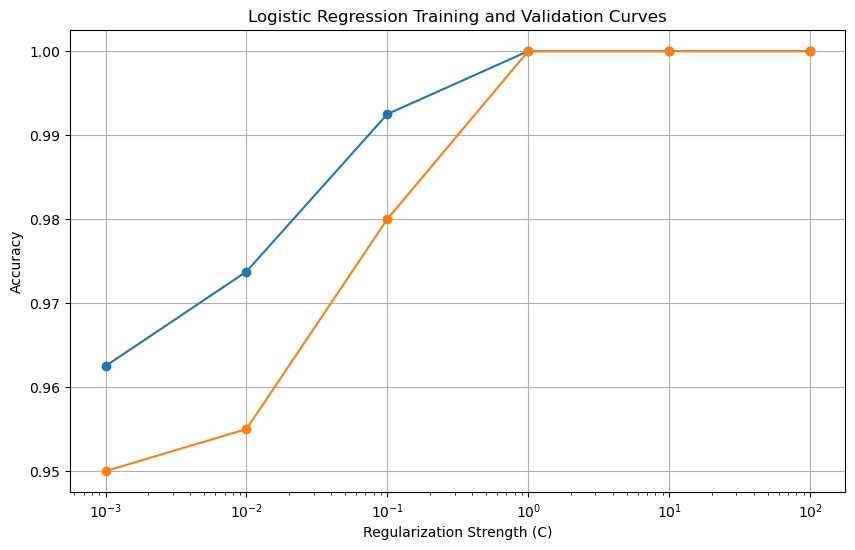

In [74]:
plt.figure(figsize=(10,6))
plt.plot(C_values, train_scores, label= "Training Accuracy", marker='o')
plt.plot(C_values, test_scores, label= "Testing Accuracy", marker='o')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title("Logistic Regression Training and Validation Curves")
plt.xscale('log')
plt.legend
plt.grid(True)

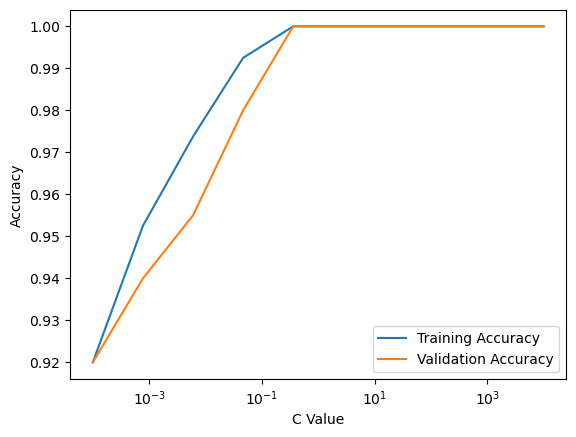

In [75]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C_values = np.logspace(-4, 4, 10)

train_scores = []
test_scores = []

for C in C_values:
    model = LogisticRegression(C=C, random_state=42)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Compute the accuracy score on the training data
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    # Compute the accuracy score on the validation data
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)

import matplotlib.pyplot as plt

plt.plot(C_values, train_scores, label='Training Accuracy')
plt.plot(C_values, test_scores, label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# K-fold

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k = 10

kf = KFold(n_splits=k, shuffle=True)

model = LogisticRegression()

cv_scores = cross_val_score(model, X, y, cv=kf)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average cross-validation score: 1.0


### Feature Distribution

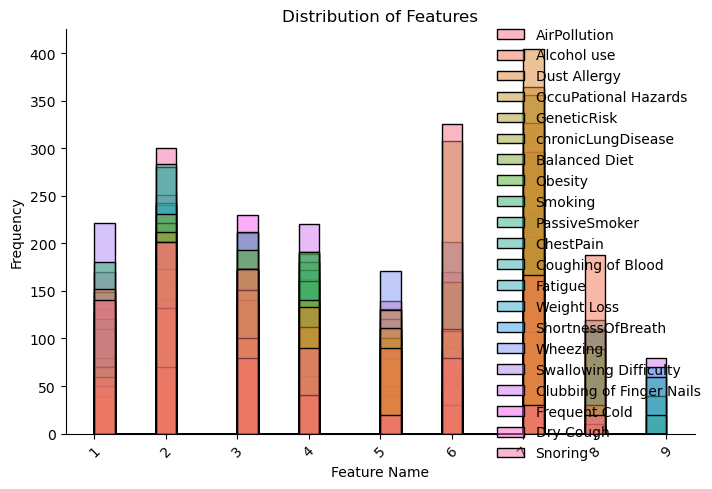

In [77]:
import seaborn as sns

sns.displot(X)  
plt.xlabel("Feature Name")
plt.ylabel("Frequency")
plt.title("Distribution of Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()